## Today Content
- Scikit Learn Introduction
- Encoding Techniques
    - get_dummies()
    - Label Encoder
- Preprocessing Introduction

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nagamounika5/Datasets/master/Global%20Dataset/Market_Fact.csv')

In [3]:
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [4]:
df['Product_Base_Margin'].mean()

0.5125131957773527

In [5]:
round(df['Product_Base_Margin'].mean(), 1)

0.5

In [7]:
df["Product_Base_Margin"] = df["Product_Base_Margin"].fillna(round(df["Product_Base_Margin"].mean(), 2))

In [8]:
df.loc[107]

Ord_id                 Ord_250
Prod_id                Prod_15
Ship_id                SHP_346
Cust_id                Cust_45
Sales                  8901.78
Discount                  0.04
Order_Quantity              31
Profit                 2795.36
Shipping_Cost            24.49
Product_Base_Margin       0.51
Name: 107, dtype: object

### Introduction to Scikit Learn
- Scikit Learn is most widely used library for machine learning.
- It contains lot of efficient tools, in-built models like statistical models, machine learning models, preprocessing models, etc...
    - Machine learning models like K-Nearest neighbours, K means, etc..

- https://scikit-learn.org/stable/

### Encoding Techniques
- Encoding techniques is used to convert Categorical data into Numerical data
    - get_dummies
    - Label Encoder

In [9]:
titanic = pd.read_csv('https://raw.githubusercontent.com/nagamounika5/Datasets/master/titanic.csv')

In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic.shape

(891, 12)

In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
titanic.isnull().sum().sum()

866

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 1. get_dummies()

In [15]:
dir(pd)

['Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NaT',
 'Panel',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseArray',
 'SparseDataFrame',
 'SparseDtype',
 'SparseSeries',
 'TimeGrouper',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_hashtable',
 '_lib',
 '_libs',
 '_np_version_under1p13',
 '_np_version_under1p14',
 '_np_version_under1p15',
 '_np_version_under1p16',
 '_np_version_under1p17

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
pd.get_dummies(titanic['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [19]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
pd.get_dummies(titanic['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [21]:
##  Colour
# ------------
## Red
## Green
## Blue
## black
## white
## yellow
## pink
## gold

### 2. Label Encoder

In [ ]:
# pip install sklearn

In [24]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [22]:
# from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [26]:
titanic['Sex'] = le.fit_transform(titanic['Sex'])

In [27]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [30]:
titanic['Cabin'].value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
F33                3
E101               3
F2                 3
C22 C26            3
D                  3
C125               2
B58 B60            2
C92                2
B57 B59 B63 B66    2
C123               2
B35                2
F G73              2
C83                2
E24                2
C78                2
E33                2
D17                2
B49                2
E8                 2
C93                2
B5                 2
B18                2
E121               2
F4                 2
C2                 2
E25                2
C68                2
                  ..
D15                1
C103               1
D37                1
C70                1
B39                1
E40                1
E36                1
C7                 1
C82                1
D7                 1
A20                1
C106               1
D21                1
D48                1
A10                1
D56                1
B73          

In [31]:
titanic['Cabin'] = le.fit_transform(titanic['Cabin'])
# Error: Because "cabin" contains Null values

TypeError: argument must be a string or number

### Task1:
- Replace null values in "Age" column with ffill
- Replace null values of "Cabin" and "Emabarked" columns with most occured values

In [32]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Task2: 
- After handling missing values, convert "Cabin" & "Embarked" columns to numerical columns using Label Encoder

## Preprocessing Data using Scikit Learn
- Scaling Techniques
    - Standard Scaler
    - Min Max Scaler
    - Robust Scaler
    - Normalizer
    - many more...

In [33]:
import matplotlib.pyplot as plt

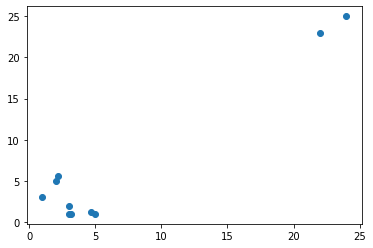

In [34]:
x = [2,3,5,1,3,4.7,3.2,2.2,22,24]
y = [5,2,1,3,1,1.2,1,5.6,23,25]
plt.scatter(x,y)

### Outliers
- Outliers are different from other data points. 
- If dataset contains outliers,it will effect the training process of machine learning algorithm, and resulting in a loss of accuracy.